In [2]:
def scatter(pred_df, true_df, title, xlabel, ylabel):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')
    plt.grid(True)
    plt.show()


def histogram(pred_df, title, xlabel):
    plt.hist(pred_df, bins=50) #, color='#015088'
    plt.xlim(0, 4)
    # plt.gcf().set_facecolor('#f3f0dfff')
    # plt.gca().set_facecolor('#f3f0dfff')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Count')
    plt.title(f'{title}')
    plt.show()

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")
    
    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")

    return pearson_corr, spearman_corr

def wilcoxon(neg, pos):
    stat, p_value = scipy.stats.ranksums(neg, pos)
    print("Wilcoxon Rank-Sum Test:")
    print(f"Test Statistic: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print("There is a significant difference between the two distributions (reject null hypothesis).")
    else:
        print("There is no significant difference between the two distributions (fail to reject null hypothesis).")

j2lfeawi 

Pearson correlation coefficient for all: -0.0755, p-value: 2.231e-06
Spearman correlation coefficient for all: -0.0864, p-value: 5.954e-08
Pearson correlation coefficient for val1: 0.2994, p-value: 3.402e-18
Spearman correlation coefficient for val1: 0.2703, p-value: 5.449e-15




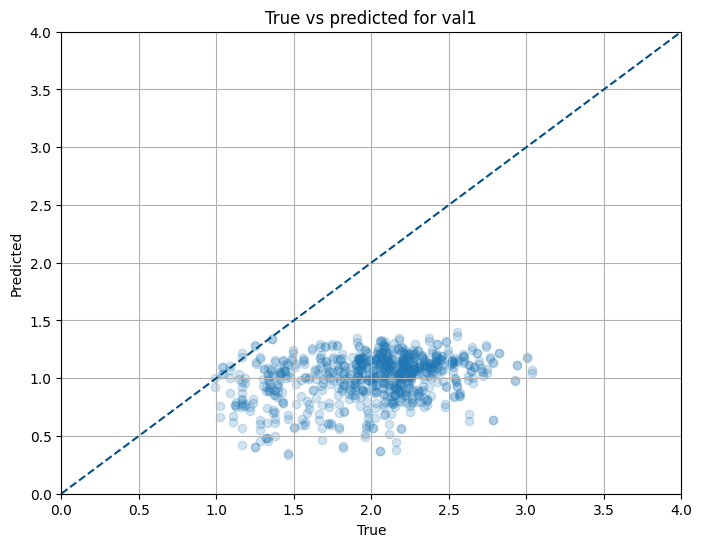

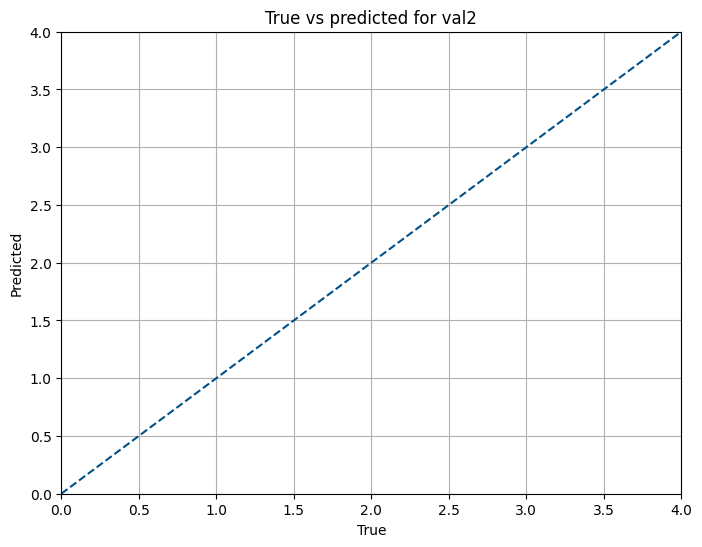

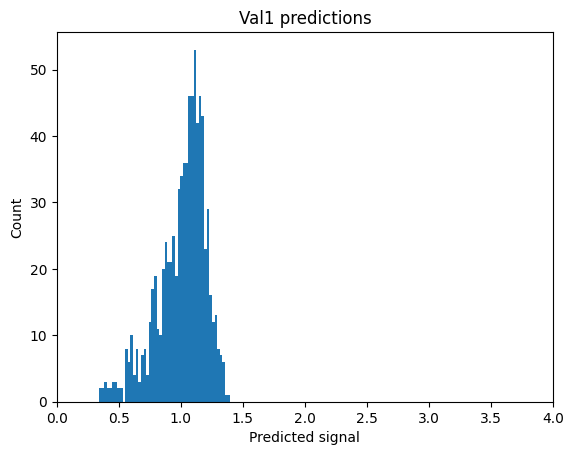

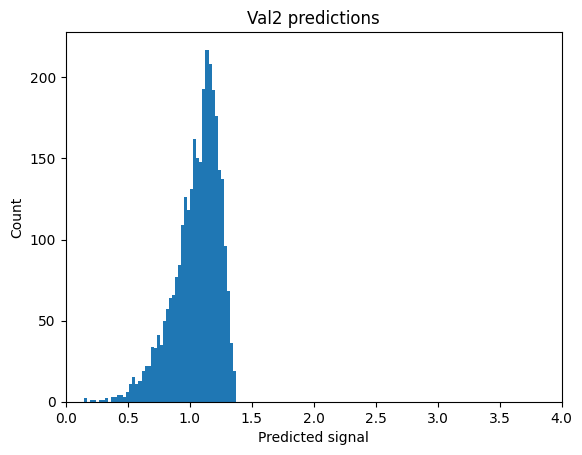

Wilcoxon Rank-Sum Test:
Test Statistic: [-6.40502623]
P-value: [1.50343534e-10]
There is a significant difference between the two distributions (reject null hypothesis).


In [11]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='gorilla'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['j2lfeawi']

for model in best2:
    print(f'{model} \n')
    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/quick_val3/gorillaLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/cnn/gorillaToHuman/gorilla_neg_VAL_genBank_500.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')
    print('\n')

    #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    # histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)


j2lfeawi 

Pearson correlation coefficient for all: 0.0034, p-value: 0.8374
Spearman correlation coefficient for all: 0.0050, p-value: 0.7582
Pearson correlation coefficient for val1: 0.4020, p-value: 2.659e-08
Spearman correlation coefficient for val1: 0.3888, p-value: 8.186e-08


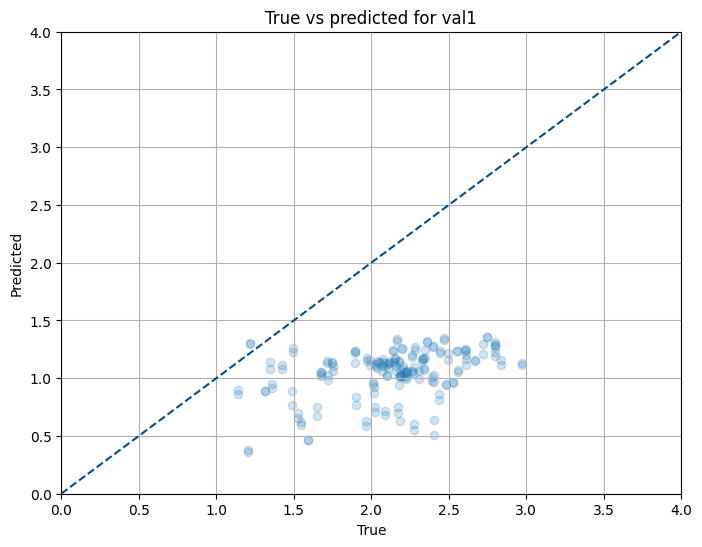

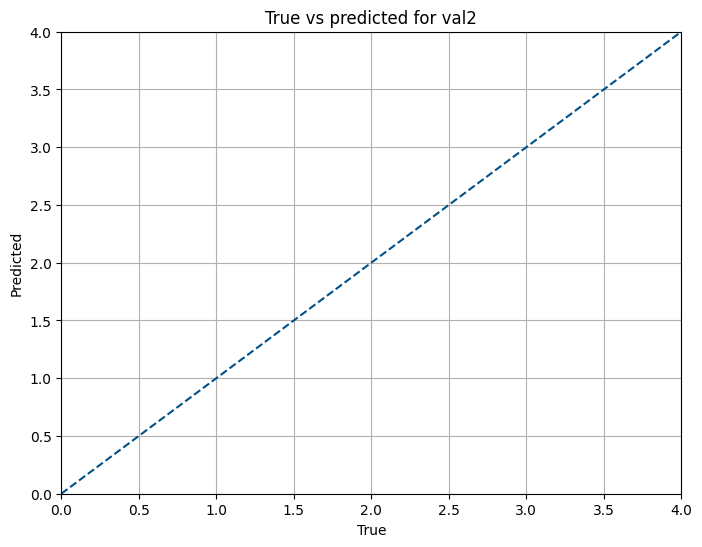

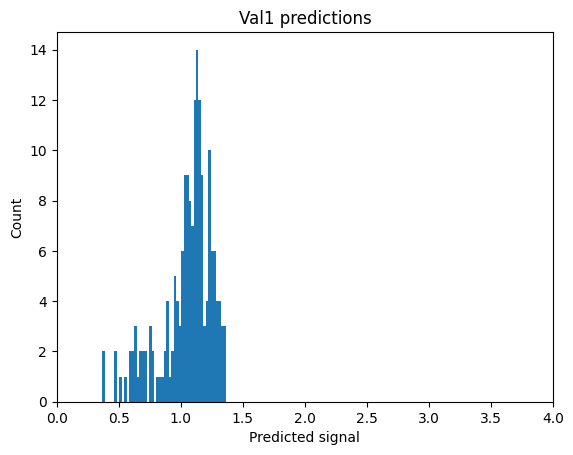

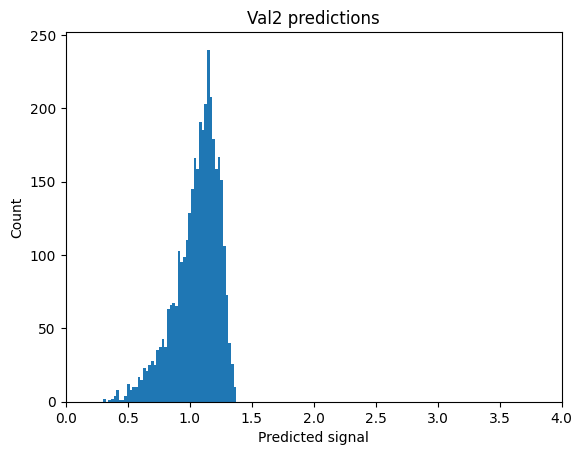

Wilcoxon Rank-Sum Test:
Test Statistic: [0.15596845]
P-value: [0.87605789]
There is no significant difference between the two distributions (fail to reject null hypothesis).


In [10]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='chimpanzee'

models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['j2lfeawi']

for model in best2:
    print(f'\n{model} \n')
    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/quick_val3/chimpanzeeLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/cnn/chimpToHuman/chimp_neg_VAL_500.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')

        #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    # histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)



j2lfeawi 

Pearson correlation coefficient for all: -0.0199, p-value: 0.1254
Spearman correlation coefficient for all: -0.0385, p-value: 0.00301
Pearson correlation coefficient for val1: 0.2173, p-value: 9.016e-10
Spearman correlation coefficient for val1: 0.2281, p-value: 1.211e-10


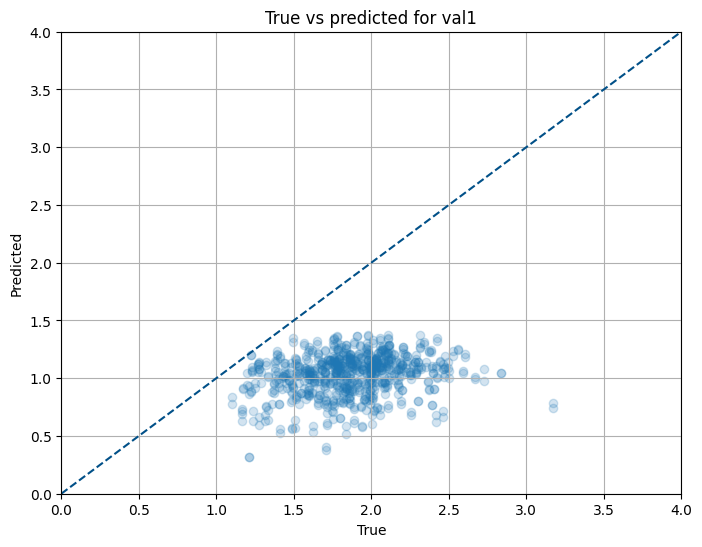

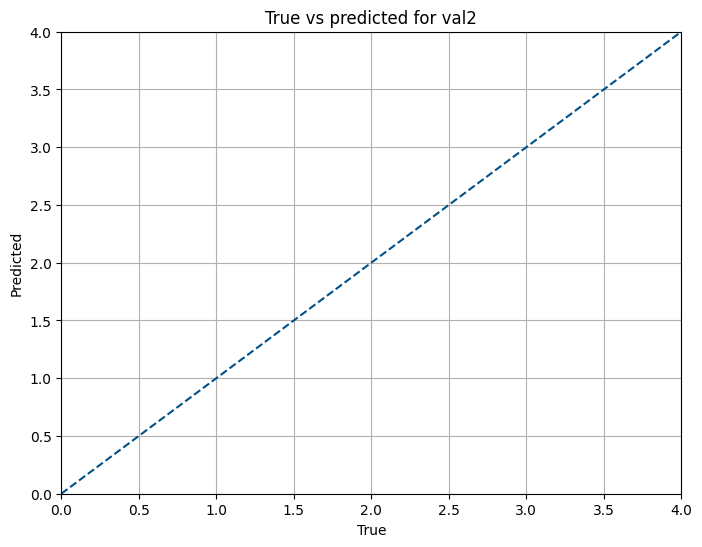

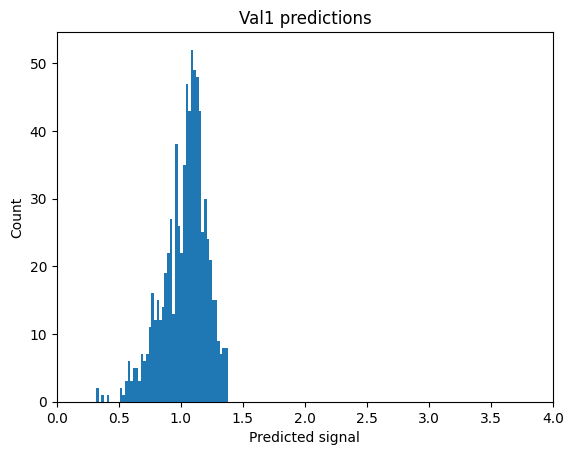

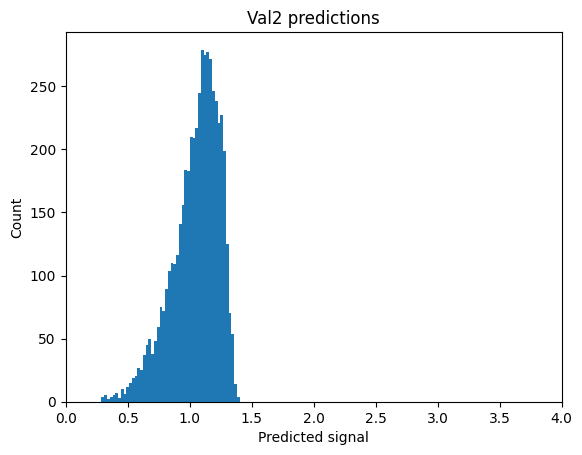

Wilcoxon Rank-Sum Test:
Test Statistic: [-3.45198094]
P-value: [0.00055649]
There is a significant difference between the two distributions (reject null hypothesis).


In [12]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='orangutan'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['j2lfeawi']

for model in best2:
    print(f'\n{model} \n')
    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/quick_val3/orangutanLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/cnn/orangutanToHuman/orangutan_neg_VAL_500.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')

    #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    # histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)




vfizpcid 

Pearson correlation coefficient for all: 0.5990, p-value: 0
Spearman correlation coefficient for all: 0.6169, p-value: 0
Pearson correlation coefficient for val1: 0.3498, p-value: 3.363e-308
Spearman correlation coefficient for val1: 0.3476, p-value: 3.807e-304


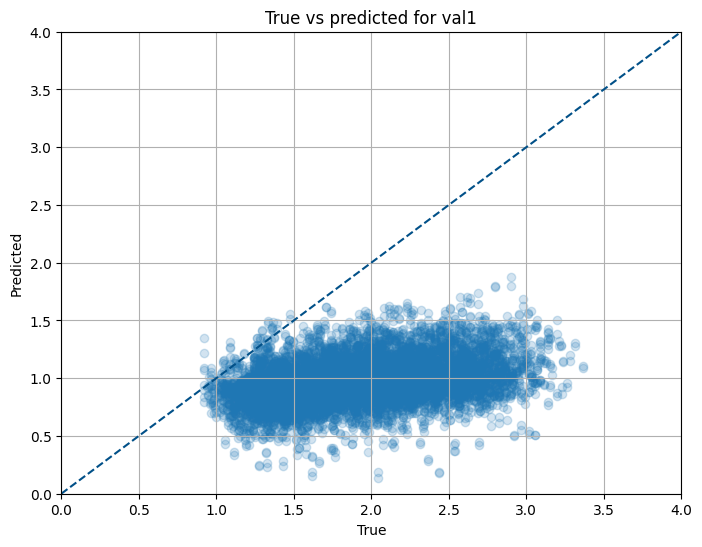

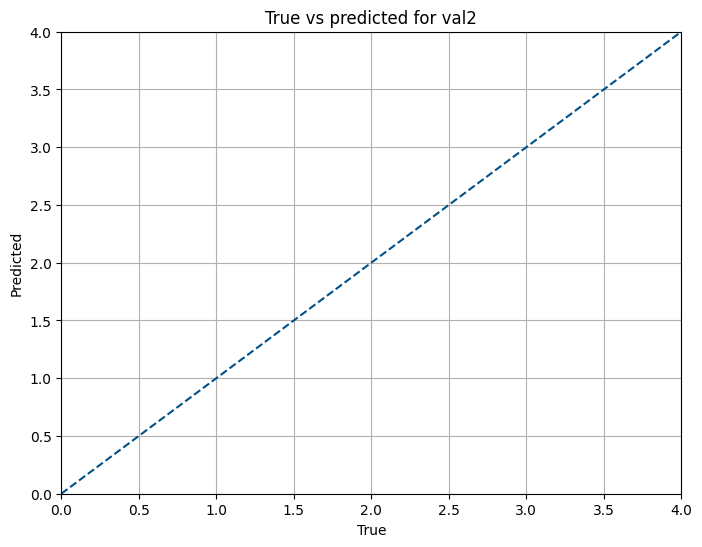

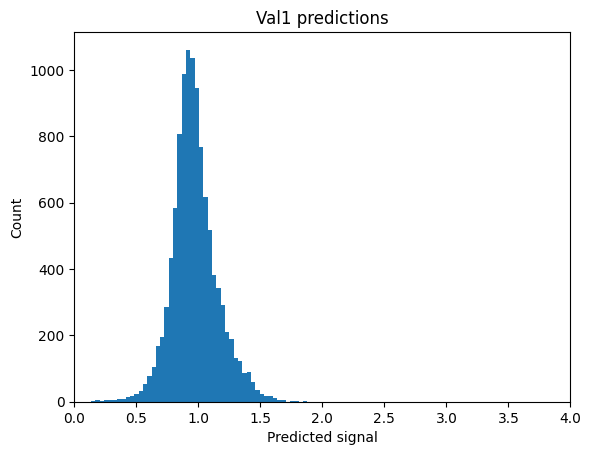

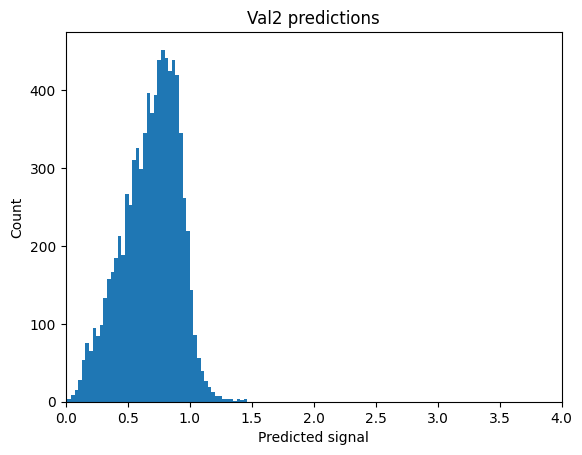

Wilcoxon Rank-Sum Test:
Test Statistic: [81.03927209]
P-value: [0.]
There is a significant difference between the two distributions (reject null hypothesis).


In [6]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='human'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['vfizpcid']

for model in best2:
    print(f'\n{model} \n')

    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/pos/humanLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/neg/humanLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')

    #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    # histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)


In [52]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='human'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = []

for model in models:
    print(f'\n{model} \n')

    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_TRAIN.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/pos/humanLCL_TRAIN.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/neg/humanLCL_TRAIN.narrowPeak', header=None, delim_whitespace=True).iloc[:,4][55:]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')



idtb2il3 

Pearson correlation coefficient for all: 0.6002, p-value: 0
Spearman correlation coefficient for all: 0.6005, p-value: 0
Pearson correlation coefficient for val1: 0.3219, p-value: 0
Spearman correlation coefficient for val1: 0.3135, p-value: 0

j2lfeawi 

Pearson correlation coefficient for all: 0.6632, p-value: 0
Spearman correlation coefficient for all: 0.6696, p-value: 0
Pearson correlation coefficient for val1: 0.3266, p-value: 0
Spearman correlation coefficient for val1: 0.3536, p-value: 0

vpgmutiv 

Pearson correlation coefficient for all: 0.5832, p-value: 0
Spearman correlation coefficient for all: 0.5676, p-value: 0
Pearson correlation coefficient for val1: 0.2634, p-value: 0
Spearman correlation coefficient for val1: 0.2644, p-value: 0

vfizpcid 

Pearson correlation coefficient for all: 0.6327, p-value: 0
Spearman correlation coefficient for all: 0.6489, p-value: 0
Pearson correlation coefficient for val1: 0.3510, p-value: 0
Spearman correlation coefficient for v


j2lfeawi 

Pearson correlation coefficient for all: 0.4503, p-value: 5.845e-244
Spearman correlation coefficient for all: 0.4737, p-value: 3.174e-273
Pearson correlation coefficient for val1: 0.2737, p-value: 2.451e-37
Spearman correlation coefficient for val1: 0.2665, p-value: 2.091e-35


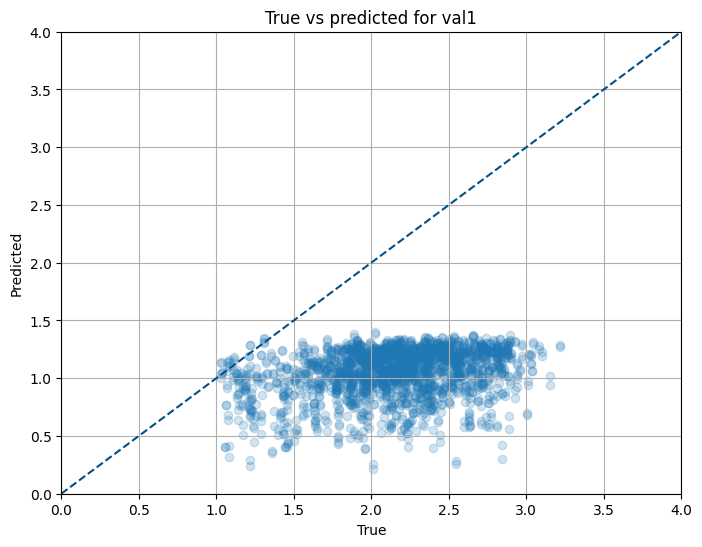

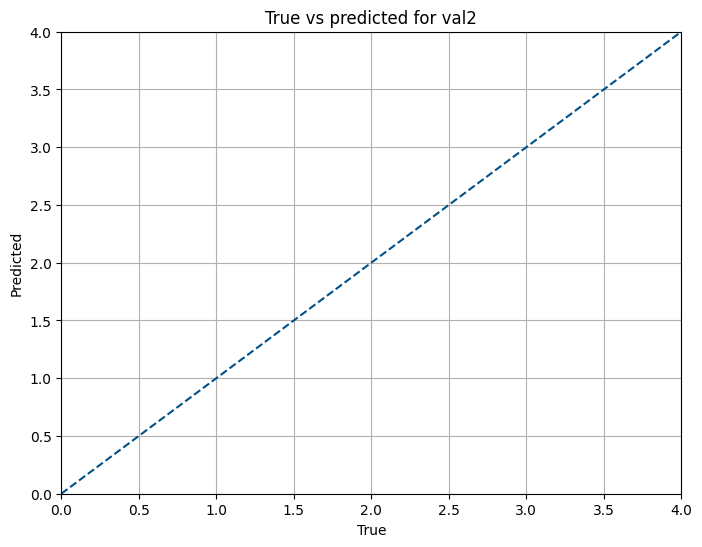

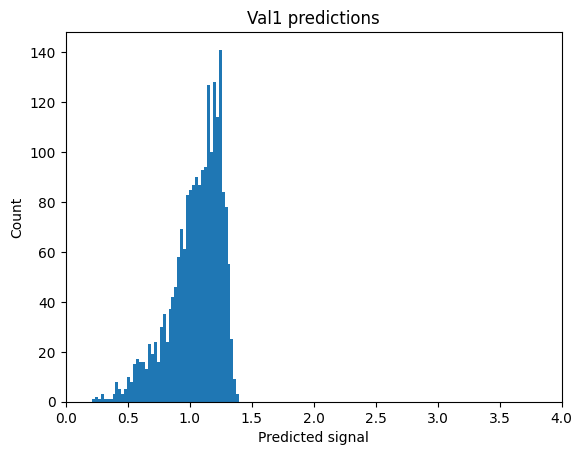

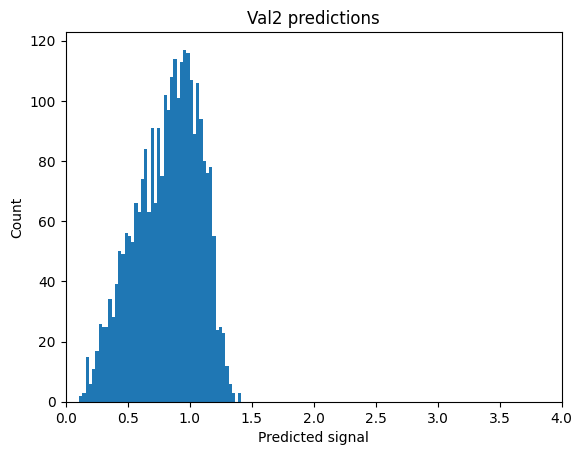

Wilcoxon Rank-Sum Test:
Test Statistic: [31.50768241]
P-value: [6.81753031e-218]
There is a significant difference between the two distributions (reject null hypothesis).


In [5]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='mouse'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['j2lfeawi']

for model in best2:
    print(f'\n{model} \n')
    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/quick_val3/mouseCH12LX_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/cnn/mouseToHuman/CH12LX_neg_VAL_500.narrowPeak', header=None, delim_whitespace=True).iloc[:,4][3:]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')

    #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')
    # histogram(pred_val3_df, 'Val3 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)




j2lfeawi 

Pearson correlation coefficient for all: 0.0084, p-value: 0.4147
Spearman correlation coefficient for all: 0.0144, p-value: 0.1644
Pearson correlation coefficient for val1: 0.0451, p-value: 0.002389
Spearman correlation coefficient for val1: 0.0525, p-value: 0.0004045


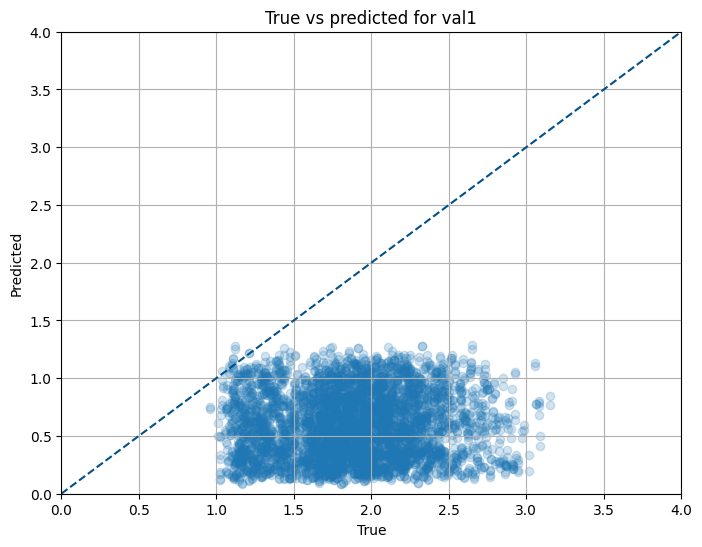

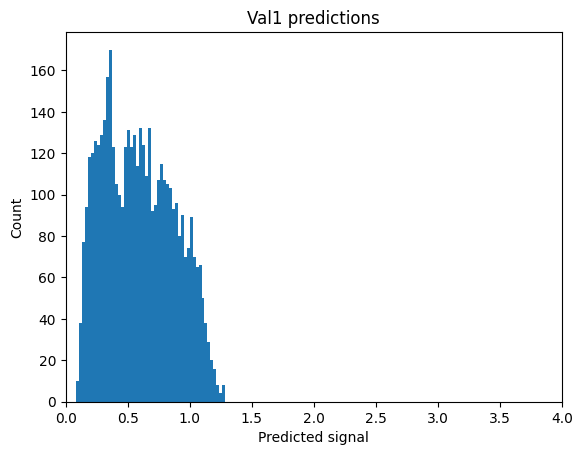

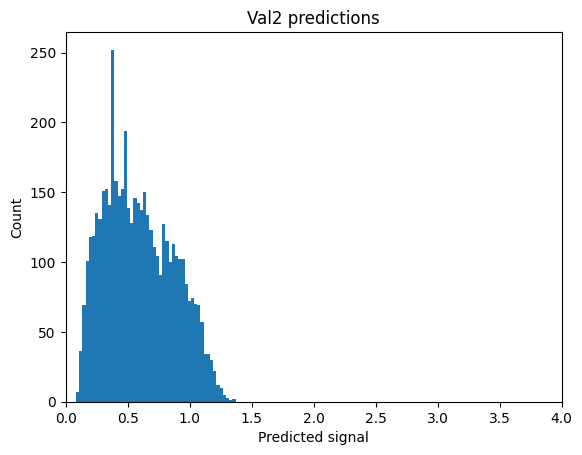

Wilcoxon Rank-Sum Test:
Test Statistic: [0.11118553]
P-value: [0.91146923]
There is no significant difference between the two distributions (fail to reject null hypothesis).


In [8]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np

species='macaque'
models = ['idtb2il3', 'j2lfeawi', 'vpgmutiv', 'vfizpcid', 'qgqnq19q', 'mzcgumhc']

best2 = ['j2lfeawi']

for model in best2:
    print(f'\n{model} \n')
    # load all the DFs
    pred_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/model_outputs/{model}/activations_{species}_VAL.csv', header=None)
    val1_df = pd.read_csv(f'/home/azstephe/immunetacit/repos/lcl_cnn/data/quick_val3/macaqueLCL_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    val2_df = pd.read_csv(f'/home/azstephe/immunetacit/cnn/macaqueToHuman/macaque_neg_VAL_500.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    #val3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/splits/log_val3/{species}_liver_VAL.narrowPeak', header=None, delim_whitespace=True).iloc[:,4]
    
    val1_len = 2*len(val1_df)
    val2_len = 2*len(val2_df)
    #val3_len = 2*len(val3_df)
    
    # input sanity check
    if len(pred_df) != val1_len+val2_len:
        print("ERROR: predictions are a different length than validation sets")
    
    doubled_val1_df = pd.concat([val1_df, val1_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_val2_df = pd.concat([val2_df, val2_df]).sort_index(kind='mergesort').reset_index(drop=True)
    #doubled_val3_df = pd.concat([val3_df, val3_df]).sort_index(kind='mergesort').reset_index(drop=True)
    
    pred_val1_df = pred_df.head(val1_len)
    pred_val2_df = pred_df.tail(val2_len)
    #pred_val3_df = pred_df.tail(val3_len)
    
    doubled_combined = pd.concat([doubled_val1_df, doubled_val2_df])

    pearson_corr_all, spearman_corr_all = correlations(pred_df, doubled_combined, 'all')
    pearson_corr_val1, spearman_corr_val1 = correlations(pred_val1_df, doubled_val1_df, 'val1')

    #####

    scatter(pred_val1_df, doubled_val1_df, 'True vs predicted for val1', 'True', 'Predicted')
    # scatter(pred_val2_df, doubled_val2_df, 'True vs predicted for val2', 'True', 'Predicted')
    # scatter(pred_val3_df, doubled_val3_df, 'True vs predicted for val3', 'True', 'Predicted')


    histogram(pred_val1_df, 'Val1 predictions', 'Predicted signal')
    histogram(pred_val2_df, 'Val2 predictions', 'Predicted signal')

    wilcoxon(pred_val1_df, pred_val2_df)





In [36]:
val2_len

52976

In [26]:
val1_len

71718